In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("data/winequality-red.csv")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
data.shape

(1599, 12)

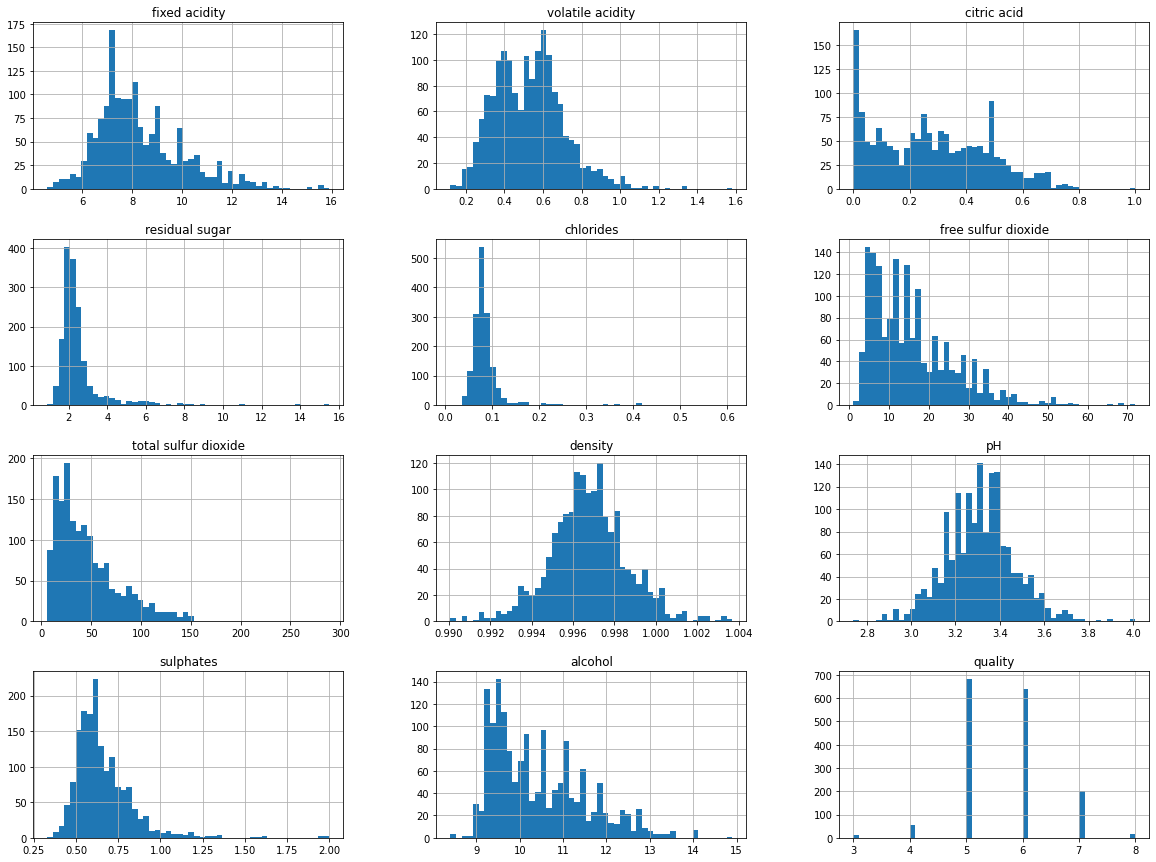

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(20,15))
plt.show()

In [7]:
data['quality'] = [1 if x > 6 else 0 for x in data.quality]

## Feature Scaling

Feature scaling is essential for machine learning algorithms that calculate distances between data.
It benefits optimization by: It makes the training faster. It prevents the optimization from getting stuck in local optima. It gives a better error surface shape. 

or 

Feature Scaling is a technique to standardize the independent features present in the data in a fixed range.

In [8]:
X = data.drop('quality',axis=1)
y = data['quality']

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
scaler_features = scaler.transform(X)

In [10]:
scaler_features

array([[-0.52835961,  0.96187667, -1.39147228, ...,  1.28864292,
        -0.57920652, -0.96024611],
       [-0.29854743,  1.96744245, -1.39147228, ..., -0.7199333 ,
         0.1289504 , -0.58477711],
       [-0.29854743,  1.29706527, -1.18607043, ..., -0.33117661,
        -0.04808883, -0.58477711],
       ...,
       [-1.1603431 , -0.09955388, -0.72391627, ...,  0.70550789,
         0.54204194,  0.54162988],
       [-1.39015528,  0.65462046, -0.77526673, ...,  1.6773996 ,
         0.30598963, -0.20930812],
       [-1.33270223, -1.21684919,  1.02199944, ...,  0.51112954,
         0.01092425,  0.54162988]])

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaler_features, y, test_size=0.3, random_state=40)

## StratifiedShuffleSplit

In [12]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=40)
for train_index, test_index in split.split(data, data["quality"]):
    X_train = data.loc[train_index]
    X_test = data.loc[test_index]

In [13]:
corr_matrix = data.corr()
corr_matrix["quality"].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.407315
citric acid             0.214716
sulphates               0.199485
fixed acidity           0.120061
residual sugar          0.047779
pH                     -0.057283
free sulfur dioxide    -0.071747
chlorides              -0.097308
total sulfur dioxide   -0.139517
density                -0.150460
volatile acidity       -0.270712
Name: quality, dtype: float64

array([[<AxesSubplot:xlabel='volatile acidity', ylabel='volatile acidity'>,
        <AxesSubplot:xlabel='citric acid', ylabel='volatile acidity'>,
        <AxesSubplot:xlabel='fixed acidity', ylabel='volatile acidity'>,
        <AxesSubplot:xlabel='pH', ylabel='volatile acidity'>,
        <AxesSubplot:xlabel='chlorides', ylabel='volatile acidity'>,
        <AxesSubplot:xlabel='total sulfur dioxide', ylabel='volatile acidity'>],
       [<AxesSubplot:xlabel='volatile acidity', ylabel='citric acid'>,
        <AxesSubplot:xlabel='citric acid', ylabel='citric acid'>,
        <AxesSubplot:xlabel='fixed acidity', ylabel='citric acid'>,
        <AxesSubplot:xlabel='pH', ylabel='citric acid'>,
        <AxesSubplot:xlabel='chlorides', ylabel='citric acid'>,
        <AxesSubplot:xlabel='total sulfur dioxide', ylabel='citric acid'>],
       [<AxesSubplot:xlabel='volatile acidity', ylabel='fixed acidity'>,
        <AxesSubplot:xlabel='citric acid', ylabel='fixed acidity'>,
        <AxesSubplot:xlab

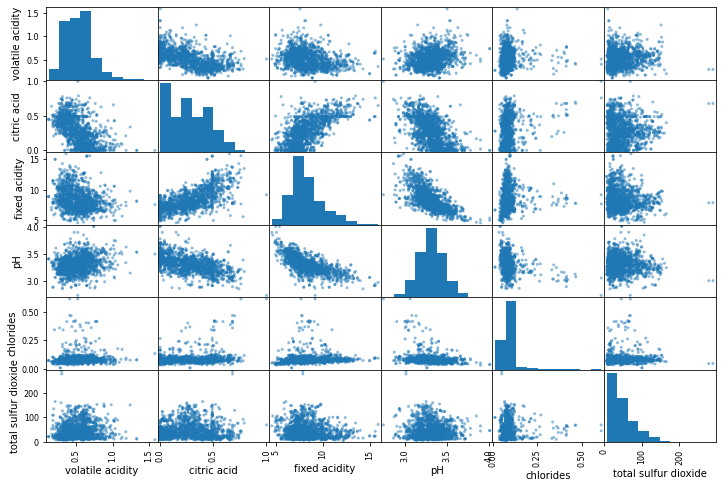

In [14]:
from pandas.plotting import scatter_matrix
attributes = ["volatile acidity",
              "citric acid","fixed acidity","pH","chlorides",
              "total sulfur dioxide"]
scatter_matrix(data[attributes], figsize=(12, 8))

##  KNeighborsClassifier

In [15]:
from sklearn.neighbors import KNeighborsClassifier

In [16]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    error_rate.append(np.mean(pred!=y_test))

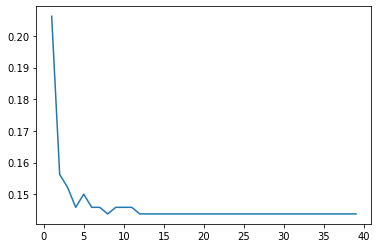

In [17]:
plt.plot(range(1,40),error_rate)

In [18]:
# We will take value 24 taking too much value can cause biasness and taking 
# too much low value can cause high variance
knn = KNeighborsClassifier(24) # minimum is 24 in graph
knn.fit(X_train,y_train)
predictions = knn.predict(X_test)

In [19]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test,predictions))
knn_Classifier_accuracy = accuracy_score(y_test,predictions)*100

[[411   0]
 [ 69   0]]
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       411
           1       0.00      0.00      0.00        69

    accuracy                           0.86       480
   macro avg       0.43      0.50      0.46       480
weighted avg       0.73      0.86      0.79       480

0.85625


## RandomForestClassifier

In [20]:
from sklearn.ensemble import RandomForestClassifier

In [21]:
RF_error_rate = []
for i in range(1,40):
    RF_classifier = RandomForestClassifier(n_estimators=i)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    RF_error_rate.append(np.mean(pred!=y_test))

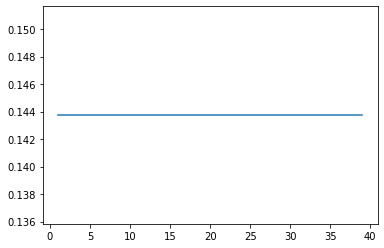

In [22]:
plt.plot(range(1,40),RF_error_rate)

In [23]:
RF_classifier = RandomForestClassifier(n_estimators=40)
RF_classifier.fit(X_train, y_train)
RF_predictions = RF_classifier.predict(X_test)

In [24]:
print(confusion_matrix(y_test,RF_predictions))
print(classification_report(y_test,RF_predictions))
print(accuracy_score(y_test,RF_predictions))
RF_Classifier_accuracy = accuracy_score(y_test,RF_predictions)*100

[[404   7]
 [ 67   2]]
              precision    recall  f1-score   support

           0       0.86      0.98      0.92       411
           1       0.22      0.03      0.05        69

    accuracy                           0.85       480
   macro avg       0.54      0.51      0.48       480
weighted avg       0.77      0.85      0.79       480

0.8458333333333333


## SVC

In [25]:
from sklearn.svm import SVC

In [26]:
svc_classifier = SVC()
svc_classifier.fit(X_train, y_train)
svc_predictions = svc_classifier.predict(X_test)

In [27]:
print(confusion_matrix(y_test,svc_predictions))
print(classification_report(y_test,svc_predictions))
print(accuracy_score(y_test,svc_predictions))
svc_classifier_accuracy = accuracy_score(y_test,svc_predictions)*100

[[411   0]
 [ 69   0]]
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       411
           1       0.00      0.00      0.00        69

    accuracy                           0.86       480
   macro avg       0.43      0.50      0.46       480
weighted avg       0.73      0.86      0.79       480

0.85625


## Accuracy Table

In [28]:
from prettytable import PrettyTable
Table = PrettyTable(["Algorithm", "Accuracy"])
Table.add_row(["KNeighborsClassifier", knn_Classifier_accuracy])
Table.add_row(["RandomForestClassifier", RF_Classifier_accuracy])
Table.add_row(["SVC", svc_classifier_accuracy])
print(Table)

+------------------------+-------------------+
|       Algorithm        |      Accuracy     |
+------------------------+-------------------+
|  KNeighborsClassifier  |       85.625      |
| RandomForestClassifier | 84.58333333333333 |
|          SVC           |       85.625      |
+------------------------+-------------------+
